In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

from matplotlib import pyplot as plt

from tqdm import tqdm

from botorch.test_functions.synthetic import Ackley

In [2]:
import sys
sys.path.append('../')
from vae import Autoencoder, WeightedAutoencoder

In [3]:
x = torch.FloatTensor(50, 10).uniform_(0, 5)
x2 = torch.FloatTensor(50, 10).uniform_(25, 32)
x = torch.concat((x,x2))

In [4]:
funct = Ackley(dim=10, noise_std=None, negate=False, bounds=None, dtype=torch.float64)
y = funct(x)
y

tensor([ 8.9471, 11.4165, 11.0712,  9.4675, 11.2625,  9.0629,  9.0009, 10.5303,
        10.0385, 10.6681, 12.3361, 11.1202,  9.4232,  8.4250, 10.7094, 11.5402,
        10.1303, 12.4330, 10.7768, 10.8495,  8.8291,  8.5585, 10.7686, 10.2477,
        10.8510, 10.3812, 10.4979, 11.1699, 12.2896, 10.1180,  9.4622,  9.3237,
        10.1305, 12.4660,  8.4006,  7.4488,  9.3307,  9.9536, 11.5460,  9.8203,
         9.6047,  9.8262, 11.2201, 12.2035, 10.5039, 10.8618,  9.6858, 12.2720,
         8.2171, 10.7718, 21.9459, 21.6068, 21.6644, 21.8005, 21.3792, 21.9269,
        21.7504, 21.6479, 21.5704, 21.3958, 21.8998, 21.5302, 21.9346, 21.6241,
        21.5238, 21.8491, 21.8156, 21.7235, 21.6763, 21.8520, 21.6474, 21.7941,
        21.2507, 21.4857, 21.8115, 21.7507, 21.8912, 21.6950, 21.4406, 21.6949,
        21.6891, 21.4496, 21.6344, 21.6552, 21.8018, 21.3652, 21.6348, 21.6491,
        21.6039, 21.8093, 21.6546, 21.6450, 21.8691, 21.7093, 21.7110, 21.9624,
        21.6370, 21.4507, 21.4997, 21.69

c:\Users\danin\Downloads\ict-f0ntys-internship\experiments\..\vae.py:221: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)


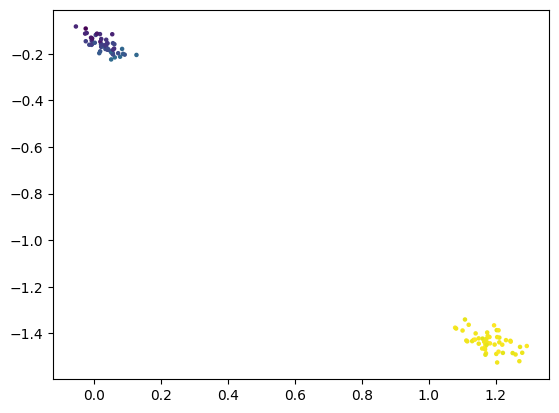

In [5]:
vae = WeightedAutoencoder()
vae_result = vae.fit_transform(x, y, optim_direc=['max'])
vae_result
plt.scatter(vae_result[:, 0], vae_result[:, 1], c=y, cmap='viridis', s=5)

In [6]:
x_pred = vae.inverse_transform(vae_result)
r2_score(x, x_pred)

0.9366894960403442

c:\Users\danin\Downloads\ict-f0ntys-internship\experiments\..\vae.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
c:\Users\danin\Downloads\ict-f0ntys-internship\experiments\..\vae.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
C:\Users\danin\AppData\Local\Temp\ipykernel_26388\800334216.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(vae_result[:, 0], vae_result[:, 1], cmap='viridis', s=5)


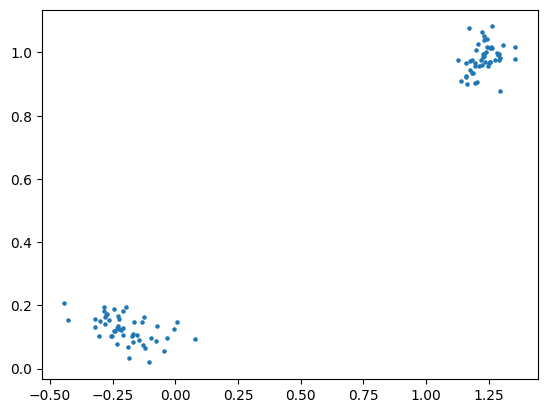

In [7]:
vae = Autoencoder()
vae_result = vae.fit_transform(x)
vae_result
plt.scatter(vae_result[:, 0], vae_result[:, 1], cmap='viridis', s=5)

In [8]:
x_pred = vae.inverse_transform(vae_result)
r2_score(x, x_pred)

0.9711373448371887